# TensorFlow2教程-mlp及深度学习常见技巧

我们将以mlp对为，基础模型，然后介绍一些深度学习常见技巧， 如：
权重初始化， 激活函数， 优化器， 批规范化， dropout，模型集成 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-alpha0


## 1.导入数据

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 784)   (60000,)
(10000, 784)   (10000,)


## 2.基础模型

In [14]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)

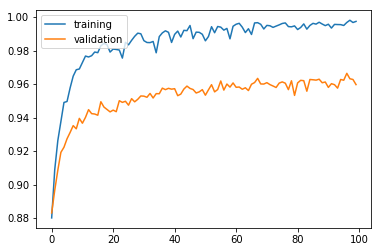

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [22]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.4429 - accuracy: 0.9632


## 3.权重初始化

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)

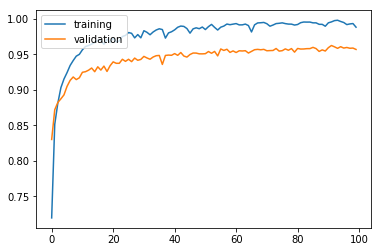

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [31]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.4355 - accuracy: 0.9587


## 4.激活函数

relu和sigmoid对比
![image.png](https://camo.githubusercontent.com/4ebe11b2d35be8367317d7b2540969035a3684d4/687474703a2f2f63733233316e2e6769746875622e696f2f6173736574732f6e6e312f72656c752e6a706567)
![image.png](https://camo.githubusercontent.com/e41af2fedc3c479e87ee43f4954572257545469c/687474703a2f2f63733233316e2e6769746875622e696f2f6173736574732f6e6e312f7369676d6f69642e6a706567)

In [32]:
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(784,)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)

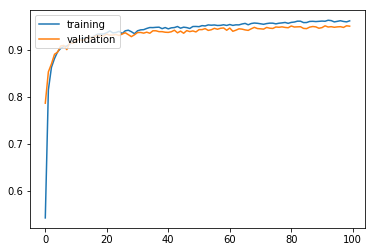

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [35]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.1526 - accuracy: 0.9529


## 5.优化器
![](https://camo.githubusercontent.com/246c076552c81303a7fcf65bda596179dc9b8418/687474703a2f2f63733233316e2e6769746875622e696f2f6173736574732f6e6e332f6f7074322e676966)

In [36]:
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(784,)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.SGD(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)

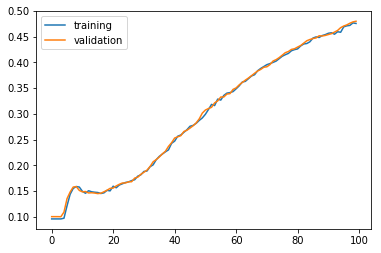

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [39]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 2.1199 - accuracy: 0.4749


## 6.批正则化

In [41]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.SGD(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_v2 (Batc (None, 64)                256       
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 64)                256       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 64)                256       
_________________________________________________________________
dense_34 (Dense)             (None, 10)               

In [42]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)

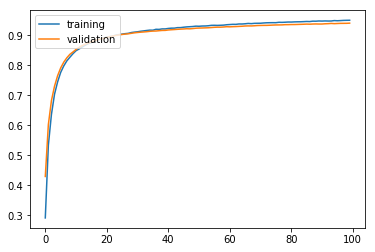

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [44]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.1863 - accuracy: 0.9447


## 7.dropout
![](https://camo.githubusercontent.com/9acd196479c9c42db52a9b7ecefaaa301abb07fa/68747470733a2f2f696d6167652e736c696465736861726563646e2e636f6d2f6c65637475726532392d636f6e766f6c7574696f6e616c6e657572616c6e6574776f726b732d766973696f6e737072696e67323031352d3135303530343131343134302d636f6e76657273696f6e2d6761746530322f39352f6c6563747572652d32392d636f6e766f6c7574696f6e616c2d6e657572616c2d6e6574776f726b732d636f6d70757465722d766973696f6e2d737072696e67323031352d36322d3633382e6a70673f63623d31343330373430303036)

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.SGD(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)               

In [46]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)

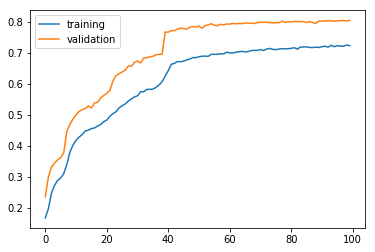

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [48]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.6157 - accuracy: 0.8132


## 8.模型集成
下面是使用投票的方法进行模型集成

![](https://camo.githubusercontent.com/c5d820739f5ab9bef5ecbd8b8db585d11d858ecf/68747470733a2f2f656e637279707465642d74626e302e677374617469632e636f6d2f696d616765733f713d74626e3a414e643947635273314342534574707035796a36534a354b5f6e486431464e6679455961394b4c6a57666f4d595f763741525471337464705677)

In [54]:
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def mlp_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.SGD(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
    return model
model1 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=0)
model2 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=0)
model3 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=0)


In [55]:
ensemble_clf = VotingClassifier(estimators=[
    ('model1', model1), ('model2', model2), ('model3', model3)
], voting='soft')

In [56]:
ensemble_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('model1', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4ed7d4c518>), ('model2', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4ed7d4c470>), ('model3', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4ed7d4c588>)],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [57]:
y_pred = ensemble_clf.predict(x_test)
print('acc: ', accuracy_score(y_pred, y_test))

acc:  0.9504


## 9.全部使用

In [5]:
from tensorflow.keras import layers

import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def mlp_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.SGD(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
    return model
model1 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=0)
model2 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=0)
model3 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=0)
model4 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=0)
ensemble_clf = VotingClassifier(estimators=[
    ('model1', model1), ('model2', model2), ('model3', model3),('model4', model4)])



In [9]:
ensemble_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('model1', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7183d246a0>), ('model2', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7183d245c0>), ('model3', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7183d5a198>), ('model4', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f71839c94e0>)],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [10]:
y_predict = ensemble_clf.predict(x_test)

In [11]:
print('acc: ', accuracy_scoreecuracy_scorecuracy_score(y_pred, y_test))

NameError: name 'y_pred' is not defined